##Instalar librerías

In [ ]:
import numpy as np
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from scipy import signal
#from scipy import fftpack
from importlib import reload
#from scipy import stats

#PARA LAS SEÑALES DE MATLAB
import scipy.io as sio

import csv

import pandas as pd

from sklearn.model_selection import train_test_split

import re

import math as mt

#import itertools

#from gapminder import gapminder

from pprint import pprint

import seaborn as sn

##Montar drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Ejercicio 1

El conjunto de datos german *credit.csv* contiene información sobre personas que solicitaron créditos bancarios en bancos alemanes en el año 1994. Contiene 20 variables:

* creditability: si devolvió el crédito (1) o no (0)
* account.balance: toma valores 1,2,3,4 e indica que no tiene cuenta(1), que tiene una cuenta poco balanceada (2) o bien balanceada (4).
* duration.of.credit..month. (en meses).
* payment.status.of.previous.credit: toma valores de 0 a 4, 0 no pagó, 4 pagó todo.
* purpose: Toma valores de 0 a 10, indicando el objeto que el cliente desea comprar, por ejemplo 0 es un auto.
* credit.amount : variable numérica con el crédito solicitado.
* Svalue.savings.stocks: dinero ahorrado, toma valores de 1 a 5, 1 = nada, 2, ≤ 100, 3, (100, 500], 4 (500, 1000].
* length.of.current.employment: Toma valores de 1 a 5, desempleado (1), < 1 año (2), [1, 4) años (3), [4, 7) años (4), más de 7 años (5).
* instalment.per.cent: toma valores 1 a 4, donde 1 indica que financia más del 35 % del crédito, 2: (25 %, 35 %), 3: [20 %, 25 %), 4: menos del 20 %.
* sex...marital.status:valores de 1 a 4, 1: Male, Divorced, 2: Male, Single, 3: Male, Married/Widowed, 4: Female.
* guarantors: toma valores de 1 a 3: Ninguno, garantía por un co-solicitante, garantía.
* duration.in.current.address valores: de 1 a 4.
* most.valuable.available.asset: 1 a 4 que son: None, Car, Life Insurance, Real Estate.
* age..years: edad variable num´erica.
* concurrent.credits: valores de 1 a 3, en otro banco, en otra entidad financiera, no tiene.
* type.of.apartment: valores de 1 a 3 que son :Free, Rented, Owned.
* no.of.credits.at.this.bank: valores de 1 a 4.
* occupation: valores de 1 a 4, Unemployed, Unskilled Permanent Resident, Skilled, Executive.
* no.of.dependents : toma valores 1 y 2, más de 3 propiedades o menos de 3.

* telephone: toma valores 1 o 2, (sí o no) 

* foreign.worker: 1, 2 si o no



##Codigo


In [ ]:
def moda_1(df):
  if len(df.mode()) != 1:
    moda = df.mode()[1]
  else:
    moda = df.mode()[0]
  return moda

###Preparación de los datos

In [ ]:
path = "/content/drive/Shareddrives/Machine Learning/TP2/german_credit.csv"
data_original = pd.read_csv(path)

data_original

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [ ]:
data_original.info()#Nos fijamos que todos los atributos tengan la misma cantidad de datos no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

####Dicretizacion de Datos

In [ ]:
data_original.groupby('Duration of Credit (month)').size()#Discretizar [0,6m](1),(6m,12m](2),(12m,18m](3),(18m,24m](4),>24m(5)

Duration of Credit (month)
4       6
5       1
6      75
7       5
8       7
9      49
10     28
11      9
12    179
13      4
14      4
15     64
16      2
18    113
20      8
21     30
22      2
24    184
26      1
27     13
28      3
30     40
33      3
36     83
39      5
40      1
42     11
45      5
47      1
48     48
54      2
60     13
72      1
dtype: int64

In [ ]:
data_original.groupby('Credit Amount').size()#Discretizar [0,5k](1),(5k,10k](2),(10k,15k](3),>15k(4)

Credit Amount
250      1
276      1
338      1
339      1
343      1
        ..
15653    1
15672    1
15857    1
15945    1
18424    1
Length: 923, dtype: int64

In [ ]:
data_original.groupby('Age (years)').size()#Discretizar [18,25](1),(25,35](2),(35,45](3),(45,60](4),>60(5)

Age (years)
19     2
20    14
21    14
22    27
23    48
24    45
25    40
26    49
27    50
28    43
29    37
30    40
31    38
32    34
33    33
34    33
35    40
36    40
37    29
38    24
39    21
40    27
41    17
42    22
43    17
44    17
45    15
46    18
47    17
48    12
49    14
50    10
51     8
52     9
53     7
54    10
55     8
56     3
57     9
58     5
59     3
60     6
61     7
62     2
63     8
64     5
65     5
66     5
67     3
68     3
70     1
74     4
75     2
dtype: int64

In [ ]:
#Discretizar: Duracion del prestamo, Monto del credito, Edad
data1 = data_original.copy()

#Duration of Credit (month) : [0,10m](1),(10m,12m](2),(12m,18m](3),(18m,24m](4),>24m(5)
data1.loc[(data1['Duration of Credit (month)']<=10), 'Duration of Credit (month)'] = 1
data1.loc[(data1['Duration of Credit (month)']>10) & (data1['Duration of Credit (month)']<=12), 'Duration of Credit (month)'] = 2
data1.loc[(data1['Duration of Credit (month)']>12) & (data1['Duration of Credit (month)']<=18), 'Duration of Credit (month)'] = 3
data1.loc[(data1['Duration of Credit (month)']>18) & (data1['Duration of Credit (month)']<=24), 'Duration of Credit (month)'] = 4
data1.loc[(data1['Duration of Credit (month)']>24), 'Duration of Credit (month)'] = 5

#Credit Amount : #[0,1.5k](1),(1.5k,2.5k](2),(2.5k,5k](3),>5k(4)
data1.loc[(data1['Credit Amount']<=1500), 'Credit Amount'] = 1
data1.loc[(data1['Credit Amount']>1500) & (data1['Credit Amount']<=2500), 'Credit Amount'] = 2
data1.loc[(data1['Credit Amount']>2500) & (data1['Credit Amount']<=5000), 'Credit Amount'] = 3
data1.loc[(data1['Credit Amount']>5000), 'Credit Amount'] = 4

#Age (years) : [18,27](1),(27,35](2),(35,45](3),>45(4)
data1.loc[(data1['Age (years)']<=27), 'Age (years)'] = 1
data1.loc[(data1['Age (years)']>27) & (data1['Age (years)']<=35), 'Age (years)'] = 2
data1.loc[(data1['Age (years)']>35) & (data1['Age (years)']<=45), 'Age (years)'] = 3
data1.loc[(data1['Age (years)']>45), 'Age (years)'] = 4

data1

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,3,4,2,1,1,2,4,2,1,4,2,1,3,1,1,3,1,1,1
1,1,1,1,4,0,3,1,3,2,3,1,2,1,3,3,1,2,3,2,1,1
2,1,2,2,2,9,1,2,4,2,2,1,4,1,1,3,1,1,2,1,1,1
3,1,1,2,4,0,2,1,3,3,3,1,2,1,3,3,1,2,2,2,1,2
4,1,1,2,4,0,2,1,3,4,3,1,4,2,3,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,4,2,3,2,1,3,2,3,1,4,1,1,3,1,1,2,2,1,1
996,0,1,4,2,0,2,1,5,4,3,2,1,1,3,3,2,1,3,1,1,1
997,0,4,4,4,0,4,5,5,4,3,1,4,4,2,3,3,1,4,1,2,1
998,0,2,2,2,3,4,5,1,2,3,1,1,4,4,3,2,1,4,1,2,1


In [ ]:
data1.groupby('Duration of Credit (month)').size()#[0,10m](1),(10m,12m](2),(12m,18m](3),(18m,24m](4),>24m(5)

Duration of Credit (month)
1    171
2    188
3    187
4    224
5    230
dtype: int64

In [ ]:
data1.groupby('Credit Amount').size()#[0,1.5k](1),(1.5k,2k](2),(3k,5k](3),>5k(4)

Credit Amount
1    306
2    231
3    275
4    188
dtype: int64

In [ ]:
data1.groupby('Age (years)').size()#[18,27](1),(27,35](2),(35,45](3),>45(4)

Age (years)
1    289
2    298
3    229
4    184
dtype: int64

####Conjunto de entrenamiento y testeo

In [ ]:
size_test1= 0.3
test1,train1 = train_test_split(data1, train_size = size_test1, random_state = 2) #data es mi conjunto de entrenamiento

In [ ]:
train1

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
37,1,4,2,4,3,2,1,5,2,3,1,2,4,1,3,2,2,3,1,1,1
726,1,4,4,2,0,3,3,4,1,2,1,2,3,2,1,2,1,4,1,1,1
846,0,2,5,3,3,2,2,2,4,3,1,3,4,2,2,2,2,4,1,1,1
295,1,4,5,2,1,4,1,3,1,2,1,2,2,2,1,2,1,3,1,1,1
924,0,1,4,3,6,3,1,2,2,3,1,1,2,1,2,2,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0,2,1,1,1,4,1,5,2,2,1,4,4,4,1,3,1,4,2,2,1
594,1,1,5,0,2,3,1,3,2,1,3,2,1,2,3,2,2,3,1,1,1
693,1,4,3,3,1,3,1,2,1,2,1,2,2,4,3,2,2,2,1,1,1
531,1,4,4,4,1,2,5,4,4,3,1,4,3,3,3,2,2,3,2,2,1


In [ ]:
test1

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
127,1,4,1,2,2,3,3,3,1,3,1,2,3,2,3,2,1,3,1,2,1
735,1,4,1,2,4,1,3,3,1,1,1,4,1,4,3,2,1,3,1,1,1
57,1,1,3,2,3,1,1,2,4,4,1,2,1,1,3,2,1,3,1,1,2
33,1,4,4,2,3,1,3,4,4,2,1,1,3,2,3,2,1,3,1,1,1
237,1,1,4,2,3,2,1,5,4,3,1,4,1,4,1,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,1,3,2,3,2,1,2,4,2,1,1,3,1,2,2,1,3,1,1,1
584,0,1,2,2,2,4,1,5,4,3,1,4,4,4,3,3,1,4,1,2,1
493,1,4,4,4,3,3,1,5,4,4,2,3,1,4,3,2,2,3,1,1,1
527,1,2,2,2,3,3,1,4,2,2,1,1,1,1,3,2,1,3,1,1,1


###Algoritmo ID3

Para calcular la ganancia se utilizó:


$$ G(S,A) = H(S) - \sum_{v \in \text{dom}Valores(A)} \frac{|S_v|}{|S|} \cdot H(S_v) $$


* $S$: conjunto de entrenamiento
* $A$: atributo 
* $S_v$: subconjunto de S para el cual el atributo A tiene valor v. 

ya habiendo calculado:

$$H(S) = -\sum_{i = 1}^n p_i \cdot \log_2 (p_i) $$

Donde $p_i$ es la frecuencia relativa de la clase i en S

$$H(S_v) = -\sum_{j = 1}^n p_j \cdot \log_2 (p_j) $$

Donde $p_j$ es la frecuencia relativa del valor v y clase j en S, j = 1,....n.

In [ ]:
#Entropia de Shannon
def entropia_shannon(data_,S='Creditability'):#H(S)
  heads = data_.columns
  H = 0#entropia de cada atributo
  S_val = np.unique(data_[S],return_counts=True)[1]
  prob = S_val/len(data_)
  for i in range(0,len(S_val)):
    if prob[i] != 0:
      H -= prob[i] * mt.log2(prob[i]) 
  return H

In [ ]:
#Ganancia 
def gain(data_,S,nodos_posibles):#S es el conjunto de atributos, es la palabra del nodo y A es el atributo de los posibles nodos
  H_S = entropia_shannon(data_,S)
  S_total = len(data_)
  ganancia = 0
  for A in nodos_posibles:#recorro los distintos A
    G_S_A = H_S
    A_val = np.unique(data_[A])#valores que puede tomar A, ej A=Pronostico A_val=sol,nublado,lluvioso 
    for j in A_val:#recorro los valores de A
      aux_tabla = data_.loc[(data_[A]==j)]
      aux_tabla = pd.DataFrame(aux_tabla)
      H_S_A_val = entropia_shannon(aux_tabla,S)
      S_val = len(aux_tabla)
      G_S_A -= abs(S_val/S_total) * H_S_A_val
    if ganancia < G_S_A:
      ganancia = G_S_A
      nodo = A
  nodos_posibles = nodos_posibles.drop(nodo)
  return nodo,nodos_posibles

In [ ]:
#ID3 
def ID3_arbol(data_,clase,max_iter=10,nodos_posibles=0,iter=0):
  #1 Si los atributos estan vacios, devolver un arbol de un unico nodo raiz, con rotulo el valor mas frecuente del atributo objetivo 
  if (len(data_.columns) == 1) or (iter >= max_iter):
    return moda_1(data_[clase])
  #2 Si todos los ejemplos son positivos, devolver un arbol de un unico nodo, raiz, con rotulo positivo
  #3 Si todos los ejemplos son negativos, devolver un arbol de un unico nodo raiz, con rotulo negativo.
  elif len(np.unique(data_[clase])) == 1:
    return moda_1(data_[clase])
  #4 Si no es ninguna de estas opciones: nueva rama
  else:
    iter +=1
    if iter == 1:
      nodos_posibles = data_.columns.drop(clase)
    
    nodo,nodos_posibles = gain(data_,clase,nodos_posibles)
    
    arbol = {nodo:{}}
    for i in np.unique(data_[nodo]):
      data_cortada = data_.loc[(data_[nodo]==i)]
      data_cortada = pd.DataFrame(data_cortada)
      arbolito = ID3_arbol(data_cortada,clase,max_iter,nodos_posibles,iter)
      arbol[nodo][i] = arbolito
    return arbol

In [ ]:
#Prediccion para un dataFrame y matriz de confusion de ID3
def prediccion_df(test_,arbol_,clase='Creditability',devolver=2):#devolver: 0 devuelve Creditability predicha, 1 devuelve precision, 2 devuelve tabla_clase,matriz_confusion_,tabla_VF_
  testeo_ = test_.copy().drop(clase,axis=1)
  clasif = []
  real = []
  for row in range(len(test_.index)): 
    dato_=testeo_.iloc[row]
    real.append(test_['Creditability'].iloc[row])
    clasif.append(prediccion(dato_,arbol_))

  #Tabla Credibility Real/Predicha  
  tabla_clase = pd.DataFrame()
  tabla_clase['Creditability real'] = real
  tabla_clase['Creditability predicha'] = clasif

  #Matriz de confusion columna predicho, fila real
  head1 = ['No','Si']
  matriz_confusion_ = pd.DataFrame(columns = head1,index = head1)
  matriz_confusion_ = matriz_confusion_.fillna(0)

  for i in range(0,len(tabla_clase)):
    matriz_confusion_.iloc[tabla_clase.iloc[i,0],tabla_clase.iloc[i,1]] += 1

  #contamos VP,VN,FP,FN
  head1_ = head1.copy()
  head1_.append('Total')
  tabla_VF_ = pd.DataFrame(columns = ['VP','VN','FP','FN'], index = head1_)
  tabla_VF_ = tabla_VF_.fillna(0)

  for i in range(0,2):#filas
    for j in range(0,2):#columnas
      if i == j:
        tabla_VF_.iloc[i,0] = matriz_confusion_.iloc[i,j]
      else:
        tabla_VF_.iloc[i,3] += matriz_confusion_.iloc[i,j]
        tabla_VF_.iloc[j,2] += matriz_confusion_.iloc[i,j]

  for i in range(0,2):
    tabla_VF_.iloc[i,1] = matriz_confusion_.sum().sum()-tabla_VF_.sum(axis=1)[i]

  for i in range(0,4):
    tabla_VF_.iloc[2,i] = tabla_VF_.sum()[i]

  #Precision
  i = 'Total'
  precision =  tabla_VF_.loc[i,'VP']/(tabla_VF_.loc[i,'VP']+tabla_VF_.loc[i,'FP'])

  if devolver == 0:
    return clasif
  elif devolver == 1:
    return precision
  else:
    return tabla_clase,matriz_confusion_,tabla_VF_,precision

####Ejemplo clase

In [ ]:
path = "/content/drive/Shareddrives/Machine Learning/TP2/jue2.csv"
data_clase = pd.read_csv(path,sep=';')

data_clase

,pronostico,humedad,viento,temperatura,juega
0,2,1,0,2,0
1,2,1,1,2,0
2,1,1,0,2,1
3,0,1,0,1,1
4,0,0,0,0,1
5,0,0,1,0,0
6,1,0,1,0,1
7,2,1,0,1,0
8,2,0,0,0,1
9,0,0,0,1,1


In [ ]:
arbol1 = ID3_arbol(data_clase,'juega',max_iter=4)
pprint(arbol1)

{'pronostico': {0: {'viento': {0: 1, 1: 0}},
                1: 1,
                2: {'humedad': {0: 1, 1: 0}}}}


###RandomForest

In [ ]:
def subconjuntos(train1_,N):
  conjuntos = []
  for i in range(0,N):
    conjunto = train1_.sample(n=len(train1_), replace = True, random_state= np.random.RandomState())
    conjuntos.append(conjunto)
  return conjuntos

In [ ]:
def random_forest(test1_,train1_,N,clase='Creditability',max_iter=10,conjuntos=None,devolver=1):#N numero de arboles, devolver= 0 precision 1 todo
  #creamos los arboles para los N conjuntos
  arboles = []
  a = list(range(0,N))
  a.append(clase + ' predicho')
  a.append(clase + ' real')
  tabla_predicciones_ = pd.DataFrame(columns = a,index=test1_.index)
  #si no le pasa los conjuntos que los haga 
  if conjuntos == None:
    conjuntos = subconjuntos(train1_,N)

  for i in range(0,N):
    #creo el arbol para cada conjunto
    arbol_conjunto = ID3_arbol(conjuntos[i],clase,max_iter)
    #print(arbol_conjunto)
    arboles.append(arbol_conjunto)
    #lleno una columna de la tabla predicciones
    predicciones = prediccion_df(test1_,arbol_conjunto,clase=clase,devolver=0)
    tabla_predicciones_[i] = predicciones
  tabla_predicciones_.iloc[:,N+1] = test1_[clase]

  for i in range(0,len(test1_)):
    moda = moda_1(tabla_predicciones_.iloc[i,0:N])
    tabla_predicciones_.iloc[i,N] = moda

  #Matriz de confusion columna predicho, fila real
  head_clase = ['No','Si']
  matriz_confusion_ = pd.DataFrame(columns = head_clase,index = head_clase)
  matriz_confusion_ = matriz_confusion_.fillna(0)
  for i in range(0,len(tabla_predicciones_)):
    matriz_confusion_.iloc[tabla_predicciones_.iloc[i,N+1],tabla_predicciones_.iloc[i,N]] += 1
  
  #contamos VP,VN,FP,FN
  head1_ = head_clase.copy()
  head1_.append('Total')
  tabla_VF_ = pd.DataFrame(columns = ['VP','VN','FP','FN'], index = head1_)
  tabla_VF_ = tabla_VF_.fillna(0)

  for i in range(0,2):#filas
    for j in range(0,2):#columnas
      if i == j:
        tabla_VF_.iloc[i,0] = matriz_confusion_.iloc[i,j]
      else:
        tabla_VF_.iloc[i,3] += matriz_confusion_.iloc[i,j]
        tabla_VF_.iloc[j,2] += matriz_confusion_.iloc[i,j]

  for i in range(0,2):
    tabla_VF_.iloc[i,1] = matriz_confusion_.sum().sum()-tabla_VF_.sum(axis=1)[i]

  for i in range(0,4):
    tabla_VF_.iloc[2,i] = tabla_VF_.sum()[i]

  #Precision
  i = 'Total'
  precision =  tabla_VF_.loc[i,'VP']/(tabla_VF_.loc[i,'VP']+tabla_VF_.loc[i,'FP'])
  
  if devolver == 0:
    return precision
  else:
    return tabla_predicciones_,matriz_confusion_,tabla_VF_,precision

###Arboles de decisión

In [ ]:
def grafico_ajuste(train1_,test1_,tipo=0,plotear=1,max_iter=15,N=5,clase='Creditability'):#tipo = 0 (arbol simple) y 1 (randomforest), plotear = 1 si, 0 no
  precision_anterior_test =-1
  precision_actual_test = 0
  i=1
  profundidad = []#eje x
  precision_test = []#eje y 
  precision_train = []#eje y 
  conjuntos1 = subconjuntos(train1,N)
  while (precision_anterior_test != precision_actual_test) and i<max_iter:
    precision_anterior_test = precision_actual_test
    if tipo == 0:#arbol simple
      arbol_actual = ID3_arbol(train1,clase,i)
      precision_actual_test = prediccion_df(test1_,arbol_actual,clase=clase,devolver=1)
      precision_actual_train = prediccion_df(train1_,arbol_actual,clase=clase,devolver=1)
    else:#randomforest
      precision_actual_test = random_forest(test1_,train1_,N,clase=clase,max_iter=i,conjuntos=conjuntos1,devolver=0)
      precision_actual_train = random_forest(train1_,train1_,N,clase=clase,max_iter=i,conjuntos=conjuntos1,devolver=0)
    profundidad.append(i)
    precision_test.append(precision_actual_test)
    precision_train.append(precision_actual_train)
    i += 1

  if plotear == 1:
    plt.figure(figsize=(10,6))
    plt.title('Curva de sobreajuste', fontsize=14)
    sn.lineplot(x=profundidad,y=precision_test,label="Testeo")
    sn.lineplot(x=profundidad,y=precision_train,label="Entrenamiento")
    plt.grid()
  
  if tipo == 0:
    tabla_clase1,matriz_confusion1,tabla_VF1,precision_fun = prediccion_df(test1_,arbol_actual,clase=clase)
    return arbol_actual,tabla_clase1,matriz_confusion1,tabla_VF1,precision_fun
  else:
    tabla_predicciones_,matriz_confusion_,tabla_VF_,precision_fun = random_forest(test1_,train1_,N,clase=clase,max_iter=max_iter,conjuntos=conjuntos1)
    return tabla_predicciones_,matriz_confusion_,tabla_VF_,precision_fun

##Resultados

###Algoritmo ID3

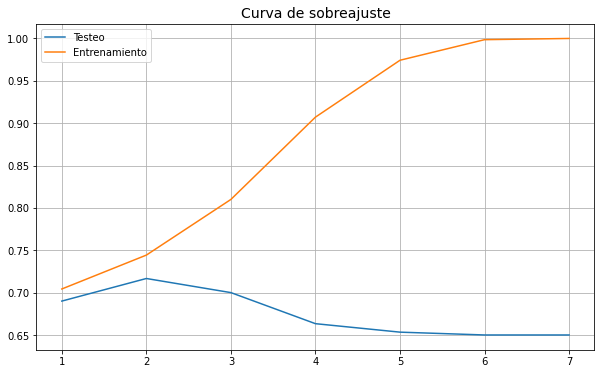

In [ ]:
arbol_actual0,tabla_clase0,matriz_confusion0,tabla_VF0,precision_tot0 = grafico_ajuste(train1,test1)

In [ ]:
pprint(arbol_actual0)

{'Account Balance': {1: {'Payment Status of Previous Credit': {0: {'Duration in Current address': {1: 1,
                                                                                                   2: 1,
                                                                                                   3: {'Duration of Credit (month)': {2: 0,
                                                                                                                                      3: 0,
                                                                                                                                      5: 1}},
                                                                                                   4: 0}},
                                                               1: {'Value Savings/Stocks': {1: {'Purpose': {0: 0,
                                                                                                            2: 0,
                                 

In [ ]:
tabla_clase0

,Creditability real,Creditability predicha
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1
...,...,...
295,1,0
296,0,1
297,1,1
298,1,0


In [ ]:
matriz_confusion0

,No,Si
No,55,38
Si,67,140


In [ ]:
tabla_VF0

,VP,VN,FP,FN
No,55,140,67,38
Si,140,55,38,67
Total,195,195,105,105


In [ ]:
precision_tot0

0.65

###Random Forest 

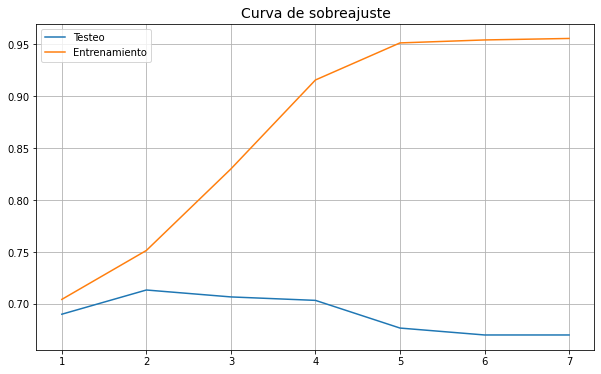

In [ ]:
tabla_predicciones11,matriz_confusion11,tabla_VF11,precision_tot11 = grafico_ajuste(train1,test1,tipo=1,max_iter=15,N=5) 

In [ ]:
tabla_predicciones11

,0,1,2,3,4,Creditability predicho,Creditability real
127,0,1,1,0,1,1,1
735,1,1,1,1,0,1,1
57,0,0,0,0,1,0,1
33,0,1,1,1,1,1,1
237,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...
534,1,0,0,1,0,0,1
584,0,0,1,1,0,0,0
493,1,1,1,1,0,1,1
527,1,1,1,0,1,1,1


In [ ]:
matriz_confusion11

,No,Si
No,51,42
Si,57,150


In [ ]:
tabla_VF11

,VP,VN,FP,FN
No,51,150,57,42
Si,150,51,42,57
Total,201,201,99,99


In [ ]:
precision_tot11

0.67

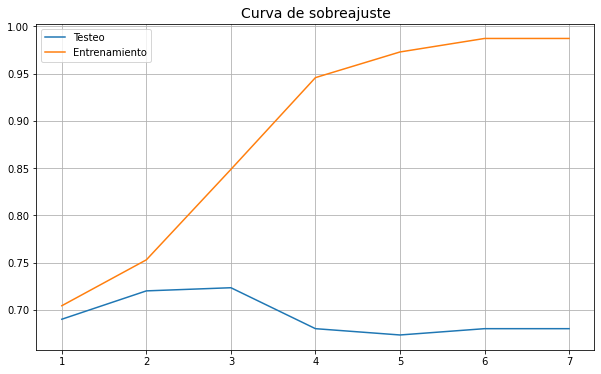

In [ ]:
tabla_predicciones12,matriz_confusion12,tabla_VF12,precision_tot12 = grafico_ajuste(train1,test1,tipo=1,max_iter=15,N=10)

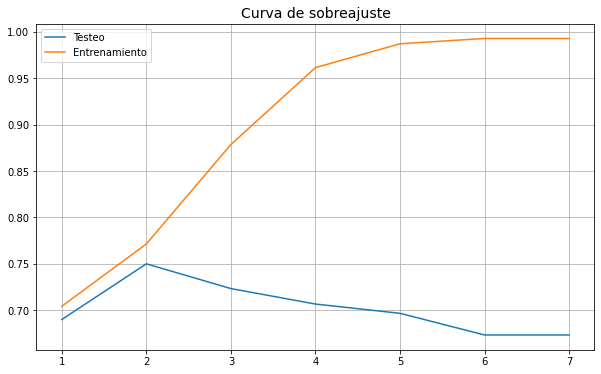

In [ ]:
tabla_predicciones13,matriz_confusion13,tabla_VF13,precision_tot13 = grafico_ajuste_(train1,test1,tipo=1,max_iter=15,N=15)

###Comparación de algoritmos

In [ ]:
#ID3
matriz_confusion0

,No,Si
No,55,38
Si,67,140


In [ ]:
#Random Forest N=5
matriz_confusion11

,No,Si
No,51,42
Si,57,150


In [ ]:
#Random Forest N=10
matriz_confusion12

,No,Si
No,43,50
Si,46,161


In [ ]:
#Random Forest N=15
matriz_confusion13

,No,Si
No,51,42
Si,56,151


#Ejercicio 2

El archivo reviews sentiment.csv contiene 257 registros con opiniones de usuarios sobre una aplicación. Variables:
* Review Title es el título del comentario.
* Review Text es el comentario.
wordcount: cantidad de palabras utilizadas.
* Title sentiment: Valoración en positiva (asignar 1) o negativa (asignar 0) estimada y puede ser NaN.
* text sentiment: Valoración positiva o negativa, provista por la persona que dejó el comentario.
* sentimentValue: valor real entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo.
* Star Raiting: estrellas que dieron los usuarios a la aplicación. Son valores discretos del 1 al 5.

##Codigo


In [ ]:
def moda_2(df):
  if len(df.mode()) != 1:
    a = np.random.randint(0, len(df.mode()))
    moda = df.mode()[a]
  else:
    moda = df.mode()[0]
  return moda

###Preparación de los datos

In [ ]:
path2 = "/content/drive/Shareddrives/Machine Learning/TP2/reviews_sentiment.csv"
review_original = pd.read_csv(path2, sep = ';')

review_original

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [ ]:
#Sacamos valores NaN
review = review_original.copy()
cant_NaN_col = review.isnull().sum(axis = 0)
moda = moda_2(pd.Series(review['titleSentiment'].values))# Calculo la moda de la columna que tiene NaN
review = review.fillna(moda) # los NaN son ahora moda. 
cant_NaN_col = review.isnull().sum(axis = 0)

#sacamos columnas que no usamos
review = review.drop(['Review Title','Review Text','textSentiment'],axis=1)

#discretizamos columnas que no usamos
review.loc[review['titleSentiment']=='negative', 'titleSentiment'] = 0
review.loc[review['titleSentiment']=='positive', 'titleSentiment'] = 1

review

,wordcount,titleSentiment,Star Rating,sentimentValue
0,23,0,1,-0.486389
1,20,0,1,-0.586187
2,4,1,1,-0.602240
3,17,1,1,-0.616271
4,6,0,1,-0.651784
...,...,...,...,...
252,3,1,5,2.814818
253,1,1,5,2.924393
254,1,1,5,2.924393
255,1,1,5,2.924393


####Conjunto de entrenamiento y testeo

In [ ]:
size_test= 0.3
test_review,train_review = train_test_split(review, train_size = size_test, random_state = 0)
train_review

,wordcount,titleSentiment,Star Rating,sentimentValue
158,3,1,5,0.335548
83,7,1,1,-0.396850
170,12,1,4,0.502011
101,18,1,3,0.104674
150,21,1,4,0.581934
...,...,...,...,...
11,9,0,1,-0.838467
119,11,1,3,0.281624
102,4,1,3,0.125126
35,27,1,2,-0.769309


In [ ]:
test_review

,wordcount,titleSentiment,Star Rating,sentimentValue
169,7,0,5,0.475378
65,1,1,3,-0.139861
1,20,0,1,-0.586187
120,8,1,3,0.283673
203,3,1,5,0.950245
...,...,...,...,...
67,1,1,3,-0.139861
192,2,1,5,0.729001
117,11,1,3,0.244713
47,3,1,3,-0.065483


### KNN

In [ ]:
def distancia(xq,train,clase = 'Star Rating'): # HAY QUE SACAR COLUMNA DE STAR RATING ANTES DE INGRESARLOS
  entreno = train.copy()
  entreno = entreno.drop([clase],axis = 1)
  # obtenemos los atributos de xtrain
  distancias = []
  # chequear que tengan igual longitud xq y xtrain
  for i in range(len(entreno)):
    dist_aux = 0
    for j in range(len(xq)):
      dist_aux += (xq[j]-entreno.iloc[i,j])**2
    dist_aux = mt.sqrt(dist_aux)
    distancias.append(dist_aux)
  distancias = pd.DataFrame(distancias,columns=['distancias'], index=entreno.index)
  return distancias

In [ ]:
def KNN(test, train, K, clase = 'Star Rating'): # xq es sin columna de Star Rating
  a = []
  for i in range(0,K):
    #a.append('K'+str(i)+' index')
    a.append('K'+str(i+1))
  a.append(clase + ' predicho')
  a.append(clase + ' real')
  tabla_predicciones_ = pd.DataFrame(columns = a,index=test.index)
  tabla_predicciones_.iloc[:,K+1] = test[clase]
  for j in range(0,len(test)):
    xq = test.drop(['Star Rating'],axis = 1).iloc[j,:]
    distancias = distancia(xq,train,clase)
    posibles_ = []
    for m in range(0,K):
      minimo = min(distancias['distancias'])
      indice = distancias.loc[distancias['distancias']== minimo].index[0]
      po = train.loc[indice,clase]
      posibles_.append(po)
      distancias = distancias.drop(indice,axis=0)
      tabla_predicciones_.iloc[j,m] = po
    #moda = tabla_predicciones_.iloc[j,0:K].mode()[0]
    moda = moda_2(tabla_predicciones_.iloc[j,0:K])
    tabla_predicciones_.iloc[j,K] = moda

  #Matriz de confusion columna predicho, fila real
  head_clase = list(np.unique(train[clase]))
  matriz_confusion_ = pd.DataFrame(columns = head_clase,index = head_clase)
  matriz_confusion_ = matriz_confusion_.fillna(0)

  for i in range(0,len(tabla_predicciones_)):
    matriz_confusion_.iloc[tabla_predicciones_.iloc[i,K+1]-1,tabla_predicciones_.iloc[i,K]-1] += 1

  #contamos VP,VN,FP,FN
  head1_ = head_clase.copy()
  head1_.append('Total')
  tabla_VF_ = pd.DataFrame(columns = ['VP','VN','FP','FN'], index = head1_)
  tabla_VF_ = tabla_VF_.fillna(0)

  h = len(head_clase)

  for i in range(0,h):#filas
    for j in range(0,h):#columnas
      if i == j:
        tabla_VF_.iloc[i,0] += matriz_confusion_.iloc[i,j]
      else:
        tabla_VF_.iloc[i,3] += matriz_confusion_.iloc[i,j]
        tabla_VF_.iloc[j,2] += matriz_confusion_.iloc[i,j]
  for i in range(0,h):
    tabla_VF_.iloc[i,1] = matriz_confusion_.sum().sum()-tabla_VF_.sum(axis=1)[i+1]
  
  for i in range(0,4):
    tabla_VF_.iloc[len(head1_)-1,i] = tabla_VF_.sum()[i]

  #Precision
  i = 'Total'
  presicion_ = tabla_VF_.loc[i,'VP']/(tabla_VF_.loc[i,'VP']+tabla_VF_.loc[i,'FP'])

  return tabla_predicciones_,matriz_confusion_,tabla_VF_,presicion_

### KNN Ponderado

In [ ]:
def KNN_ponderado(test, train, K=5, clase = 'Star Rating'): # xq es sin columna de Star Rating
  a = []
  a.append(clase + ' predicho')
  a.append(clase + ' real')
  tabla_predicciones_ = pd.DataFrame(columns = a,index=test.index)
  tabla_predicciones_.iloc[:,1] = test[clase]

  clases = list(np.unique(train[clase]))
  for j in range(0,len(test)):
    distancia_clases = np.zeros(len(clases))
    xq = test.drop([clase],axis = 1).iloc[j,:] #tengo todos los xq de test
    distancias = distancia(xq,train,clase) # lista de distancias de xq con xi
    posibles_ = [] # distancia, clase

    d_0 = []
    for m in range(K): # busca las K distancias minimas del test, el algoritmo predictivo
      minimo = min(distancias['distancias'])
      indice = distancias.loc[distancias['distancias']== minimo].index[0]
      if minimo == 0:
        po = train.loc[indice,clase]
        d_0.append(po)
      else:
        minimo = 1/minimo**2 
        po = train.loc[indice,clase]
        posibles_.append([minimo, po])
        distancias = distancias.drop(indice,axis=0)
  
    if len(d_0) == 0:
      for clas in clases:
        a = 0
        for i in range(K):
          if posibles_[i][1] == clas:
            a += posibles_[i][0]
        distancia_clases[clases.index(clas)] = a
      maxima_ = max(distancia_clases) # si hay mas de uno que es el maximo va a dar siempre 3 porque esta primero en posicion. 
      predic = clases[list(distancia_clases).index(maxima_)]
    else:
      '''d_0_df = pd.DataFrame(d_0)
      if len(d_0_df[0].mode()) != 1:
        a = np.random.randint(0, len(d_0_df[0].mode()))
        moda = d_0_df[0].mode()[a]
      else:
        moda = d_0_df[0].mode()[0]'''
      predic = moda_2(d_0_df[0])
    tabla_predicciones_.iloc[j,0] = predic

  #Matriz de confusion columna predicho, fila real
  head_clase = list(np.unique(train[clase]))
  matriz_confusion_ = pd.DataFrame(columns = head_clase,index = head_clase)
  matriz_confusion_ = matriz_confusion_.fillna(0)
  
  for i in range(0,len(tabla_predicciones_)):
    matriz_confusion_.iloc[tabla_predicciones_.iloc[i,1]-1,tabla_predicciones_.iloc[i,0]-1] += 1

  #contamos VP,VN,FP,FN
  head1_ = head_clase.copy()
  head1_.append('Total')
  tabla_VF_ = pd.DataFrame(columns = ['VP','VN','FP','FN'], index = head1_)
  tabla_VF_ = tabla_VF_.fillna(0)

  h = len(head_clase)

  for i in range(0,h):#filas
    for j in range(0,h):#columnas
      if i == j:
        tabla_VF_.iloc[i,0] += matriz_confusion_.iloc[i,j]
      else:
        tabla_VF_.iloc[i,3] += matriz_confusion_.iloc[i,j]
        tabla_VF_.iloc[j,2] += matriz_confusion_.iloc[i,j]
  for i in range(0,h):
    tabla_VF_.iloc[i,1] = matriz_confusion_.sum().sum()-tabla_VF_.sum(axis=1)[i+1]
  
  for i in range(0,4):
    tabla_VF_.iloc[len(head1_)-1,i] = tabla_VF_.sum()[i]

  #Precision
  i = 'Total'
  presicion_ = tabla_VF_.loc[i,'VP']/(tabla_VF_.loc[i,'VP']+tabla_VF_.loc[i,'FP'])

  return tabla_predicciones_,matriz_confusion_,tabla_VF_,presicion_

##Resultados


###Los comentarios valorados con 1 estrella, ¿qué cantidad promedio de palabras tienen?

In [ ]:
mean_starR = []
for i in np.unique(review['Star Rating']):
  mean_i = review.loc[review['Star Rating']==i,'wordcount'].mean()
  mean_starR.append(mean_i)

mean_starR = pd.DataFrame(mean_starR, columns =['Promedio de cantidad de palabras'],index=np.unique(review['Star Rating']))
mean_starR

,Promedio de cantidad de palabras
1,12.216216
2,41.916667
3,8.089744
4,16.366667
5,4.272727


###KNN

In [ ]:
tabla_predicciones_KNN,matriz_confusion_KNN,tabla_VF_KNN,presicion_KNN = KNN(test_review, train_review, 5)
tabla_predicciones_KNN

,K1,K2,K3,K4,K5,Star Rating predicho,Star Rating real
169,5,4,3,5,3,3,5
65,3,3,3,3,3,3,3
1,3,1,3,3,1,3,1
120,3,5,5,3,5,5,3
203,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
67,3,3,3,3,3,3,3
192,5,5,5,5,5,5,5
117,3,4,4,3,3,3,3
47,3,3,3,3,3,3,3


In [ ]:
matriz_confusion_KNN

,1,2,3,4,5
1,4,1,5,0,0
2,0,9,2,0,0
3,1,0,12,0,5
4,0,0,5,4,0
5,0,0,4,1,24


In [ ]:
tabla_VF_KNN

,VP,VN,FP,FN
1,4,66,1,6
2,9,65,1,2
3,12,43,16,6
4,4,67,1,5
5,24,43,5,5
Total,53,284,24,24


In [ ]:
presicion_KNN

0.6883116883116883

###KNN ponderado

In [ ]:
tabla_predicciones_pon,matriz_confusion_pon,tabla_VF_pon,precision_pon = KNN_ponderado(test_review, train_review, K=5, clase = 'Star Rating')

In [ ]:
tabla_predicciones_pon

,Star Rating predicho,Star Rating real
169,5,5
65,1,3
1,3,1
120,3,3
203,5,5
...,...,...
67,3,3
192,5,5
117,3,3
47,3,3


In [ ]:
matriz_confusion_pon

,1,2,3,4,5
1,5,1,4,0,0
2,0,8,3,0,0
3,2,0,15,0,1
4,0,0,2,7,0
5,2,2,2,1,22


In [ ]:
tabla_VF_pon

,VP,VN,FP,FN
1,5,63,4,5
2,8,63,3,3
3,15,48,11,3
4,7,67,1,2
5,22,47,1,7
Total,57,288,20,20


In [ ]:
precision_pon

0.7402597402597403